In [1]:
# Installiing Libraries
!pip install geopandas
!pip install pyshp
!pip install shapely
!pip install plotly==3.10.0
!pip install gerrychain
!pip install maup

     |████████████████████████████████| 972kB 4.4MB/s 
     |████████████████████████████████| 10.9MB 23.6MB/s 
     |████████████████████████████████| 14.8MB 320kB/s 
     |████████████████████████████████| 225kB 5.6MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.2-cp36-none-any.whl size=36216 sha256=43d8b7d4951d99cef802245b573380ad21761f1eaeed13b3a6f1e6b5209866d4
  Stored in directory: /root/.cache/pip/wheels/96/6c/53/4112475adf3b831da97f083163d0f38ee6daac9c1b13f7afea
Successfully built pyshp
     |████████████████████████████████| 41.5MB 100kB/s 
ERROR: cufflinks 0.17.3 has requirement plotly>=4.1.1, but you'll have plotly 3.10.0 which is incompatible.
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1
     |████████████████████████████████| 51kB 2.5MB/s 


In [2]:
# Loading gerrychain library
!git clone https://github.com/mggg/GerryChain.git

Cloning into 'GerryChain'...
remote: Enumerating objects: 42, done.
remote: Counting objects: 100% (42/42), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 6007 (delta 20), reused 23 (delta 10), pack-reused 5965
Receiving objects: 100% (6007/6007), 111.77 MiB | 24.34 MiB/s, done.
Resolving deltas: 100% (4092/4092), done.


In [3]:
# loading libraries
import matplotlib.pyplot as plt
import json, math, random, shapely, shapefile, plotly, geopandas
from gerrychain import Graph, Partition, Election
from gerrychain.updaters import Tally, cut_edges
import seaborn as sns
import pandas as pd
import plotly.plotly as py
import plotly.figure_factory as ff
import numpy as np
from matplotlib.pyplot import figure
from scipy.spatial import ConvexHull
from shapely.geometry import Polygon
plotly.tools.set_credentials_file(username='rahulmnair1997', api_key='OPP7chXNutjkqXw48K52')
from plotly.offline import init_notebook_mode, plot
init_notebook_mode()

In [4]:
path_to_pa = 'GerryChain/docs/user/PA_VTDs.json'

In [5]:
graph = Graph.from_json(path_to_pa)

In [6]:
# loading data
with open(path_to_pa) as f:
    data = json.load(f)
cd_df = pd.DataFrame(data['nodes'])
cd_df

boundary_node  boundary_perim      area  ... 538GOP 538CMPCT    id
0              True        0.063126  0.004278  ...     03       03     0
1             False             NaN  0.000551  ...     03       03     1
2             False             NaN  0.007934  ...     03       03     2
3              True        0.091923  0.010283  ...     03       03     3
4             False             NaN  0.010732  ...     03       03     4
...             ...             ...       ...  ...    ...      ...   ...
9250          False             NaN  0.002479  ...     04       04  9250
9251           True        0.044005  0.004784  ...     04       04  9251
9252          False             NaN  0.003723  ...     04       04  9252
9253          False             NaN  0.000151  ...     04       04  9253
9254          False             NaN  0.002111  ...     04       04  9254

[9255 rows x 72 columns]

In [7]:
# combining state and county FIPS code to get the 5-digit FIPS
cd_df['fips'] = cd_df['STATEFP10'] + cd_df['COUNTYFP10']

In [8]:
eth = pd.melt(cd_df[['NH_WHITE', 'NH_BLACK', 'NH_ASIAN', 'HISP', 'H_WHITE', 'H_BLACK', 'H_AMIN', 'H_ASIAN', 'H_NHPI', 'H_OTHER', 'H_2MORE']])

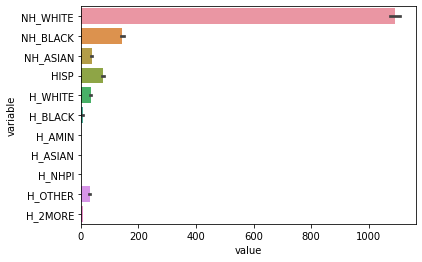

In [268]:
sns.barplot(x="value", y="variable", data=eth, orient='h')

Non-Hipspanic White mostly represented in the VTD

In [ ]:
# plotting county-wise distribution of population
States = ['PA']
values = cd_df['TOTPOP']
fips = cd_df['fips'].tolist()

# For colorscale help: https://react-colorscales.getforge.io/
colorscale = ["#fafa6e","#c4ec74","#92dc7e","#64c988","#39b58e","#109f8f","#00898a","#0a727f","#215d6e","#2a4858"]
endpts = list(np.linspace(0, 8650, len(colorscale) - 1))

fig = ff.create_choropleth(
    fips=fips, values=values, colorscale=colorscale, show_state_data=True, 
    scope=States, # Define your scope
    binning_endpoints=endpts, # If your values is a list of numbers, you can bin your values into half-open intervals
    county_outline={'color': 'rgb(255,255,255)', 'width': 0.5}, # Specify your county borders
    state_outline={'color': 'rgb(68,68,68)', 'width': 1}, # Specify your state borders
    legend_title='Population', title='Population distribution across the counties'
)

plot(fig, filename='Population_distribution_across_the_counties')

/usr/local/lib/python3.6/dist-packages/plotly/offline/offline.py:526: UserWarning:

Your filename `Population_distribution_across_the_counties` didn't end with .html. Adding .html to the end of your file.



'Population_distribution_across_the_counties.html'

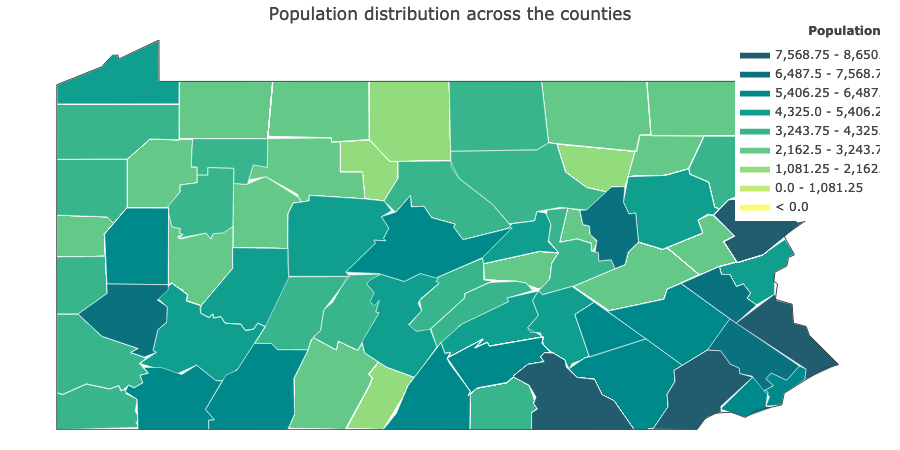

In [ ]:
len(cd_df.CD_2011.unique())

18

We have 18 congressional districts.

# Congressional Districts for 2012

In [9]:
sf_12 = shapefile.Reader("/content/BlockLevelFinalCongressionalPlan21Dec2011.shp")

In [10]:
district_12 = []
for i in range(len(sf_12.shapes())):
  district_12.append(sf_12.shape(i))

In [ ]:
len(district_12)

18

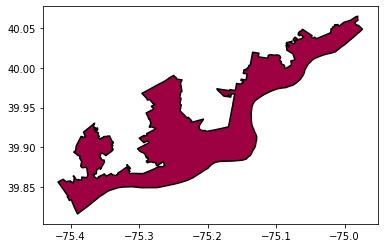

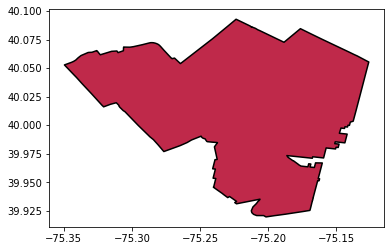

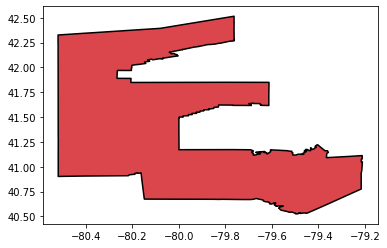

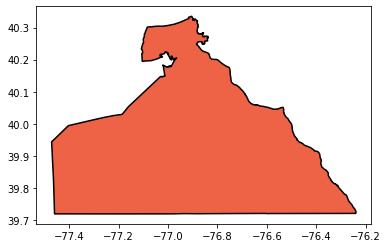

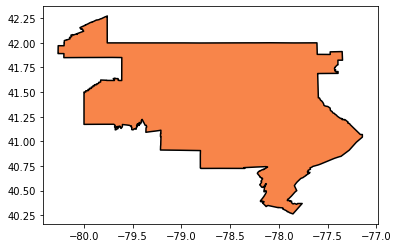

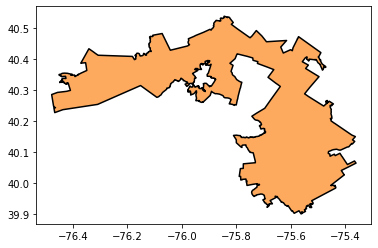

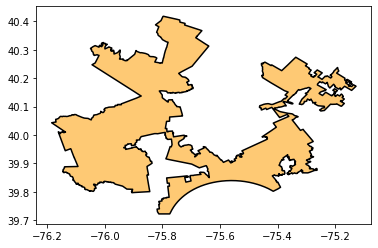

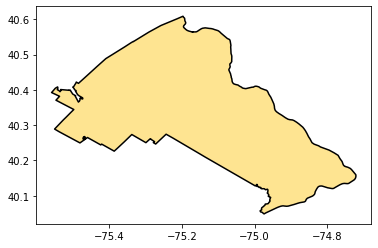

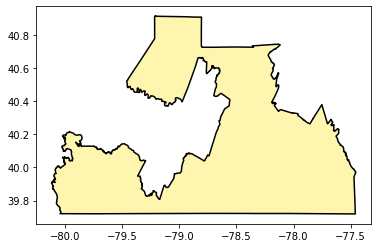

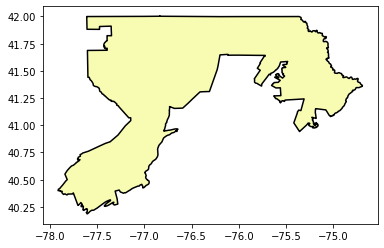

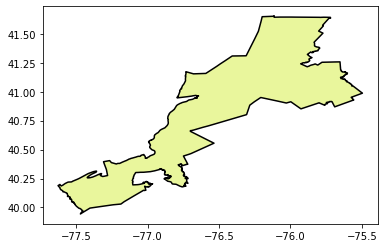

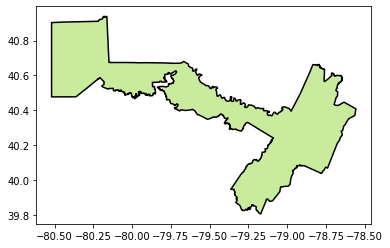

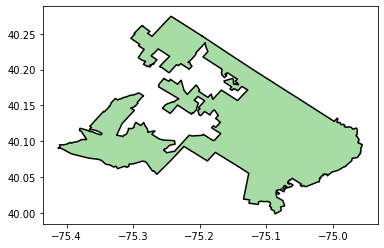

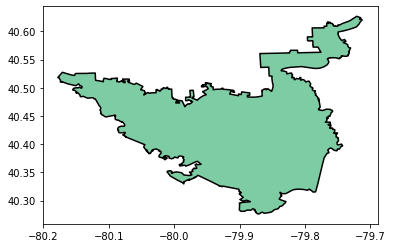

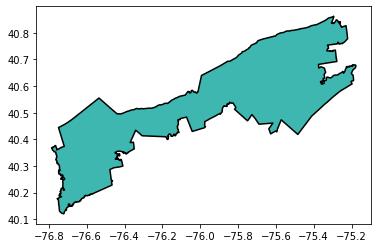

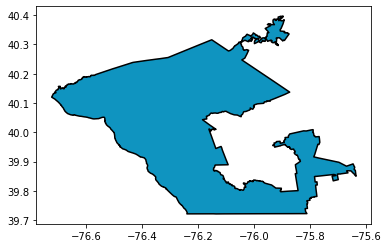

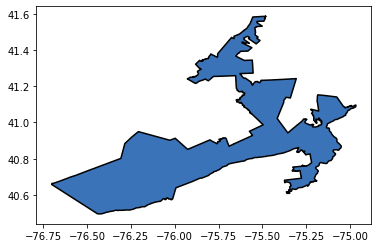

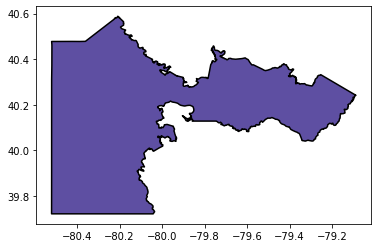

In [ ]:
c = ["#9e0142","#bf294a","#db464d","#ee6246","#f8854a","#fdaa5e","#fec974","#fee491","#fef6af","#f8fcb3","#e9f69c","#c8eb9e","#a7dca4","#7ecca4","#3db7b0","#0f94c0","#3b73b8","#5e4fa2"]
for i in range(len(district_12)):
  x_lon = np.zeros((len(district_12[i].points),1))
  y_lat = np.zeros((len(district_12[i].points),1))
  for ip in range(len(district_12[i].points)):
    x_lon[ip] = district_12[i].points[ip][0]
    y_lat[ip] = district_12[i].points[ip][1]
  plt.plot(x_lon,y_lat, 'k')
  plt.fill(x_lon, y_lat, c[i])
  plt.show()

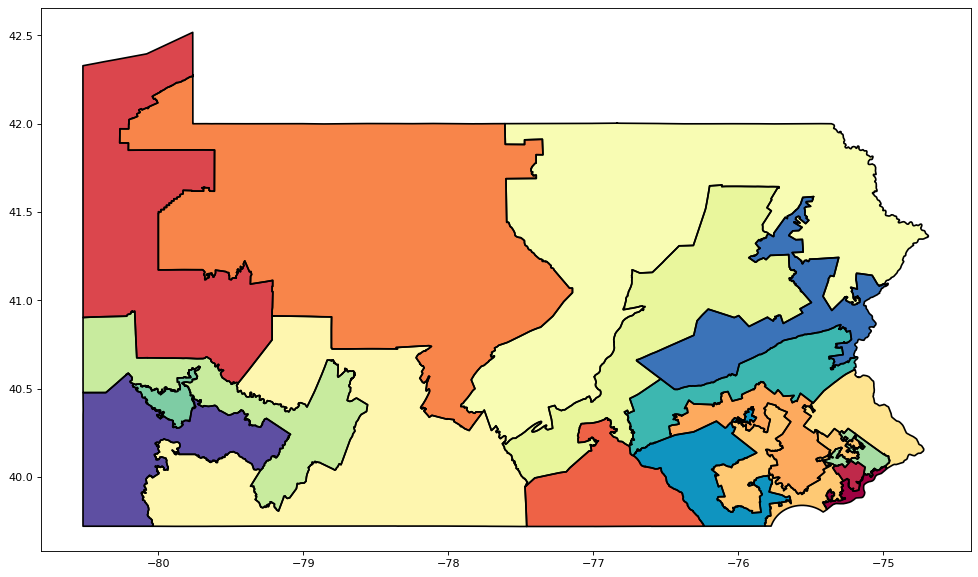

In [ ]:
fig = figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
c = ["#9e0142","#bf294a","#db464d","#ee6246","#f8854a","#fdaa5e","#fec974","#fee491","#fef6af","#f8fcb3","#e9f69c","#c8eb9e","#a7dca4","#7ecca4","#3db7b0","#0f94c0","#3b73b8","#5e4fa2"]
for i in range(len(district_12)):
  x_lon = np.zeros((len(district_12[i].points),1))
  y_lat = np.zeros((len(district_12[i].points),1))
  for ip in range(len(district_12[i].points)):
    x_lon[ip] = district_12[i].points[ip][0]
    y_lat[ip] = district_12[i].points[ip][1]
  plt.fill(x_lon, y_lat, c[i])
  plt.plot(x_lon,y_lat, 'k')
  

# Congressional Districts for 2018

In [11]:
sf_18 = shapefile.Reader("/content/PaCongressional2020_08.shp")

In [12]:
district_18 = []
for i in range(len(sf_18.shapes())):
  district_18.append(sf_18.shape(i))

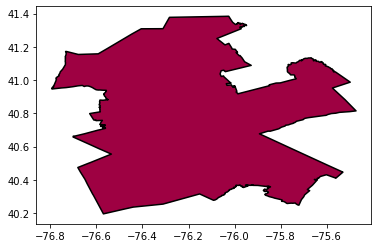

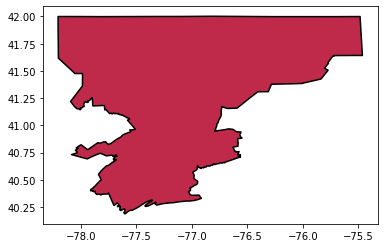

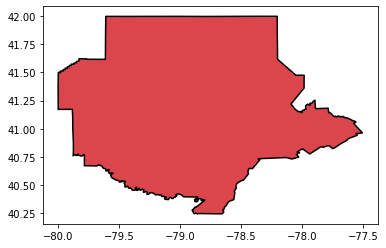

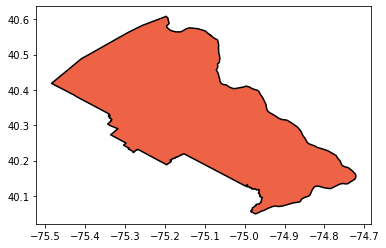

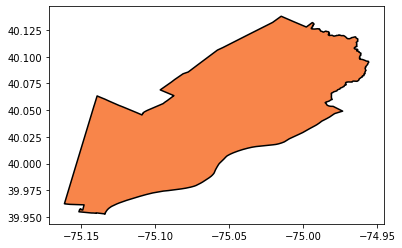

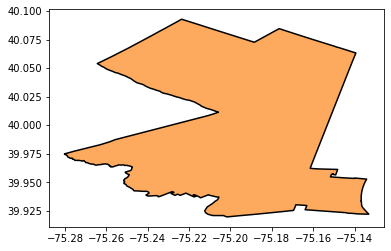

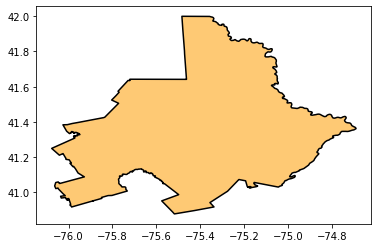

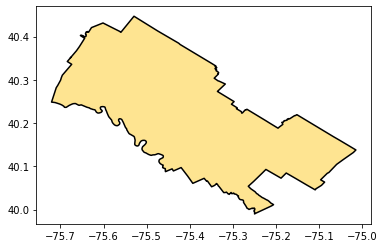

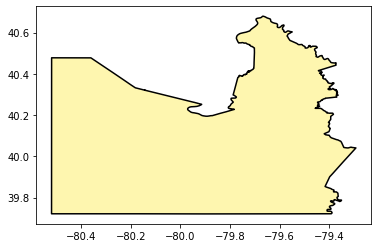

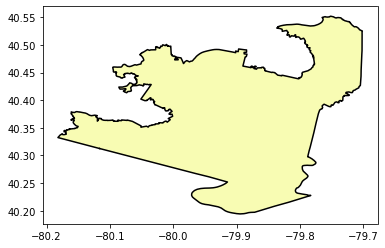

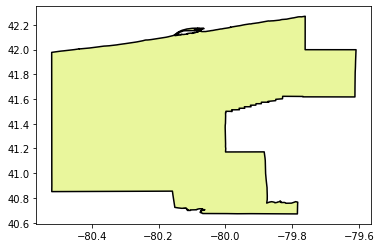

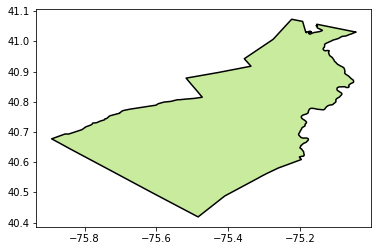

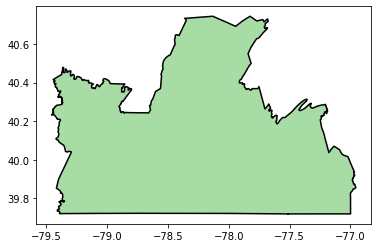

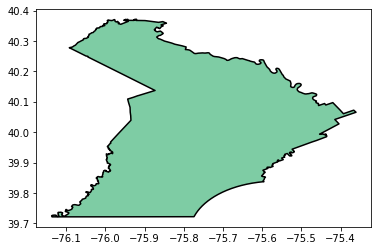

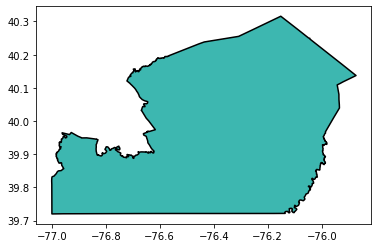

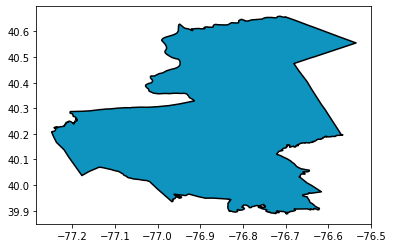

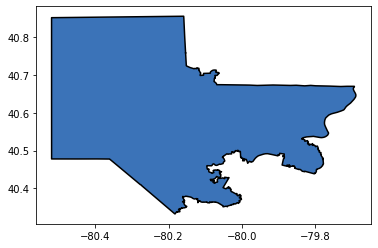

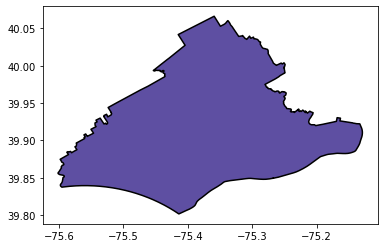

In [ ]:
c = ["#9e0142","#bf294a","#db464d","#ee6246","#f8854a","#fdaa5e","#fec974","#fee491","#fef6af","#f8fcb3","#e9f69c","#c8eb9e","#a7dca4","#7ecca4","#3db7b0","#0f94c0","#3b73b8","#5e4fa2"]
for i in range(len(district_18)):
  x_lon = np.zeros((len(district_18[i].points),1))
  y_lat = np.zeros((len(district_18[i].points),1))
  for ip in range(len(district_18[i].points)):
    x_lon[ip] = district_18[i].points[ip][0]
    y_lat[ip] = district_18[i].points[ip][1]
  plt.plot(x_lon,y_lat, 'k')
  plt.fill(x_lon, y_lat, c[i])
  plt.show()

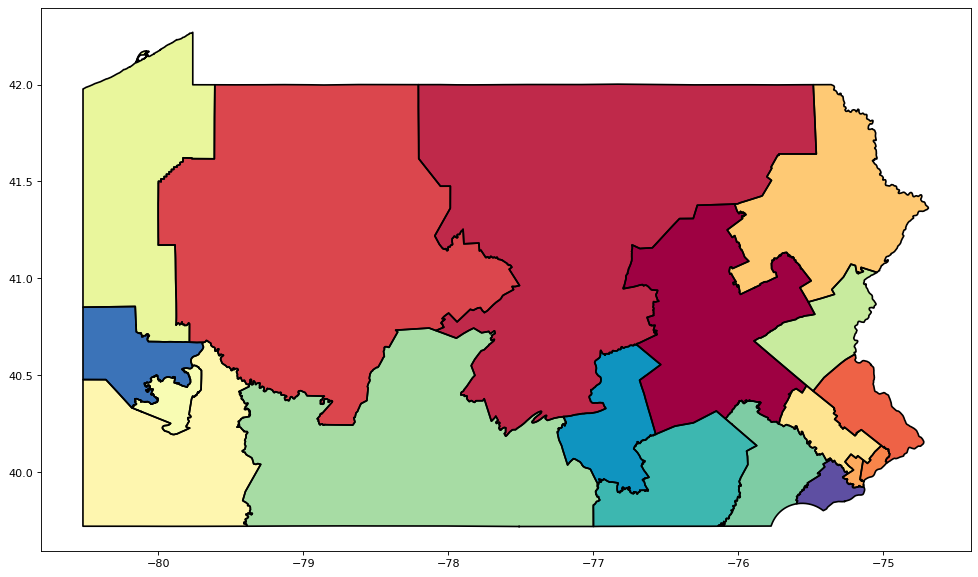

In [ ]:
fig = figure(num=None, figsize=(15, 9), dpi=80, facecolor='w', edgecolor='k')
c = ["#9e0142","#bf294a","#db464d","#ee6246","#f8854a","#fdaa5e","#fec974","#fee491","#fef6af","#f8fcb3","#e9f69c","#c8eb9e","#a7dca4","#7ecca4","#3db7b0","#0f94c0","#3b73b8","#5e4fa2"]
for i in range(len(district_18)):
  x_lon = np.zeros((len(district_18[i].points),1))
  y_lat = np.zeros((len(district_18[i].points),1))
  for ip in range(len(district_18[i].points)):
    x_lon[ip] = district_18[i].points[ip][0]
    y_lat[ip] = district_18[i].points[ip][1]
  plt.fill(x_lon, y_lat, c[i])
  plt.plot(x_lon,y_lat, 'k')

# Calculating Compactness scores for 2012 and 2018 congressional districts

In [36]:
# Calculating Polsby-Popper compactness metric
def polsby(df):
  return ((4*np.pi*df.Shape_Area)/((df.Shape_Leng)**2)) *100

# Calculating Schwartzberg compactness metric
def schwartz(df):
  return (1/(df.Shape_Leng/(2*math.sqrt(np.pi*df.Shape_Area))))*100

def convex_hull_area(df):
  points = list(zip(*df.geometry.exterior.coords.xy))
  hull = ConvexHull(points)
  return hull.area

def area_by_convex_hull(df):
  return (df.Shape_Area/df.convex_hull_area)*100

In [37]:
# Using code from https://www.nayuki.io/page/smallest-enclosing-circle
# This cell is used to calculate the area of minimum circle formed with the boundaries.

def make_circle(df):
	# Convert to float and randomize order
  points = list(zip(*df.geometry.exterior.coords.xy))
  shuffled = [(float(x), float(y)) for (x, y) in points]
  random.shuffle(shuffled)
	
	# Progressively add points to circle or recompute circle
  c = None
  for (i, p) in enumerate(shuffled):
    if c is None or not is_in_circle(c, p):
      c = _make_circle_one_point(shuffled[ : i + 1], p)
  return c


# One boundary point known
def _make_circle_one_point(points, p):
  c = (p[0], p[1], 0.0)
  for (i, q) in enumerate(points):
    if not is_in_circle(c, q):
      if c[2] == 0.0:
        c = make_diameter(p, q)
      else:
        c = _make_circle_two_points(points[ : i + 1], p, q)
  return c


# Two boundary points known
def _make_circle_two_points(points, p, q):
	circ = make_diameter(p, q)
	left  = None
	right = None
	px, py = p
	qx, qy = q
	
	# For each point not in the two-point circle
	for r in points:
		if is_in_circle(circ, r):
			continue
		
		# Form a circumcircle and classify it on left or right side
		cross = _cross_product(px, py, qx, qy, r[0], r[1])
		c = make_circumcircle(p, q, r)
		if c is None:
			continue
		elif cross > 0.0 and (left is None or _cross_product(px, py, qx, qy, c[0], c[1]) > _cross_product(px, py, qx, qy, left[0], left[1])):
			left = c
		elif cross < 0.0 and (right is None or _cross_product(px, py, qx, qy, c[0], c[1]) < _cross_product(px, py, qx, qy, right[0], right[1])):
			right = c
	
	# Select which circle to return
	if left is None and right is None:
		return circ
	elif left is None:
		return right
	elif right is None:
		return left
	else:
		return left if (left[2] <= right[2]) else right


def make_diameter(a, b):
	cx = (a[0] + b[0]) / 2
	cy = (a[1] + b[1]) / 2
	r0 = math.hypot(cx - a[0], cy - a[1])
	r1 = math.hypot(cx - b[0], cy - b[1])
	return (cx, cy, max(r0, r1))


def make_circumcircle(a, b, c):
	# Mathematical algorithm from Wikipedia: Circumscribed circle
	ox = (min(a[0], b[0], c[0]) + max(a[0], b[0], c[0])) / 2
	oy = (min(a[1], b[1], c[1]) + max(a[1], b[1], c[1])) / 2
	ax = a[0] - ox;  ay = a[1] - oy
	bx = b[0] - ox;  by = b[1] - oy
	cx = c[0] - ox;  cy = c[1] - oy
	d = (ax * (by - cy) + bx * (cy - ay) + cx * (ay - by)) * 2.0
	if d == 0.0:
		return None
	x = ox + ((ax*ax + ay*ay) * (by - cy) + (bx*bx + by*by) * (cy - ay) + (cx*cx + cy*cy) * (ay - by)) / d
	y = oy + ((ax*ax + ay*ay) * (cx - bx) + (bx*bx + by*by) * (ax - cx) + (cx*cx + cy*cy) * (bx - ax)) / d
	ra = math.hypot(x - a[0], y - a[1])
	rb = math.hypot(x - b[0], y - b[1])
	rc = math.hypot(x - c[0], y - c[1])
	return (x, y, max(ra, rb, rc))
 

_MULTIPLICATIVE_EPSILON = 1 + 1e-14


def is_in_circle(c, p):
	return c is not None and math.hypot(p[0] - c[0], p[1] - c[1]) <= c[2] * _MULTIPLICATIVE_EPSILON


# Returns twice the signed area of the triangle defined by (x0, y0), (x1, y1), (x2, y2).
def _cross_product(x0, y0, x1, y1, x2, y2):
	return (x1 - x0) * (y2 - y0) - (y1 - y0) * (x2 - x0)
 

def area_by_circle_area(df):
  return df.Shape_Area/df.circle_area

In [38]:
geo_df_18 = geopandas.read_file('/content/PaCongressional2020_08.shp')

In [39]:
geo_df_18['polsby'] = geo_df_18.apply(lambda x: polsby(x), axis=1)
geo_df_18['schwartz'] = geo_df_18.apply(lambda x: schwartz(x), axis=1)
geo_df_18['convex_hull_area'] = geo_df_18.apply(lambda x: convex_hull_area(x), axis=1)
geo_df_18['convex_hull_area'] *= 10**10
geo_df_18['area/convex_hull'] = geo_df_18.apply(lambda x: area_by_convex_hull(x), axis=1)
geo_df_18['circle'] = geo_df_18.apply(lambda x: make_circle(x), axis=1)
geo_df_18['circle_area'] = [k for i,j,k in geo_df_18.circle] 
geo_df_18['circle_area'] *= 10**9
geo_df_18['area/circle_area'] = geo_df_18.apply(lambda x: area_by_circle_area(x), axis=1)

In [40]:
geo_df_18

MSLINK  LEG_DISTRI  ...   circle_area area/circle_area
0        8           9  ...  7.046721e+08        21.364304
1       11          12  ...  1.479243e+09        31.062772
2       12          15  ...  1.273721e+09        35.335723
3       19           1  ...  4.037510e+08         7.248074
4       20           2  ...  1.256072e+08         2.318938
5       21           3  ...  9.710200e+07         2.481820
6       13           8  ...  7.124714e+08        17.674817
7       14           4  ...  3.570843e+08         5.995321
8       17          14  ...  6.798941e+08        18.686785
9       18          18  ...  2.588697e+08         5.132055
10       1          16  ...  8.248593e+08        18.834835
11       2           7  ...  4.592280e+08         8.538502
12       3          13  ...  1.275596e+09        21.037468
13       4           6  ...  4.352771e+08         9.381433
14       5          11  ...  6.004404e+08        11.372399
15       6          10  ...  4.177096e+08        11.901996
16       7          17  ...  4.363321e+08         9.294005
17      15           5  ...  2.378733e+08         4.126290

[18 rows x 24 columns]

In [41]:
geo_df_12 = geopandas.read_file('/content/BlockLevelFinalCongressionalPlan21Dec2011.shp')

In [42]:
geo_df_12 = geo_df_12.rename(columns={'SHAPE_Area': 'Shape_Area', 'SHAPE_Leng': 'Shape_Leng'})

In [43]:
# geo_df_12['polsby'] = geo_df_12.apply(lambda x: polsby(x), axis=1)
geo_df_12 = geo_df_12.rename(columns={'Compactnes': 'polsby'})
geo_df_12['schwartz'] = geo_df_12.apply(lambda x: schwartz(x), axis=1)
geo_df_12['convex_hull_area'] = geo_df_12.apply(lambda x: convex_hull_area(x), axis=1)
geo_df_12['area/convex_hull'] = geo_df_12.apply(lambda x: area_by_convex_hull(x), axis=1)
geo_df_12['circle'] = geo_df_12.apply(lambda x: make_circle(x), axis=1)
geo_df_12['circle_area'] = [k for i,j,k in geo_df_12.circle] 
geo_df_12['area/circle_area'] = geo_df_12.apply(lambda x: area_by_circle_area(x), axis=1)
geo_df_12['area/circle_area'] *= 10

In [44]:
geo_df_12

OBJECTID District_N  ...  circle_area  area/circle_area
0          1          1  ...     0.242448          1.012376
1          2          2  ...     0.116623          1.768310
2          3          3  ...     1.049737         12.403078
3          4          4  ...     0.625850          6.687735
4          5          5  ...     1.627826         18.486990
5          6          6  ...     0.569127          4.199941
6          7          7  ...     0.533105          4.464500
7          8          8  ...     0.434949          4.581565
8          9          9  ...     1.333533         11.837197
9         10         10  ...     1.683450         14.064115
10        11         11  ...     1.219685          7.784541
11        12         12  ...     1.013074          5.930335
12        13         13  ...     0.228652          1.869416
13        14         14  ...     0.245552          2.458889
14        15         15  ...     0.833424          4.287708
15        16         16  ...     0.558844          5.076885
16        17         17  ...     0.894380          5.433585
17        18         18  ...     0.771351          7.380952

[18 rows x 33 columns]

In [45]:
print('Average value of Polsby-Popper compactness metric in 2018 congressional district', np.mean(geo_df_18['polsby']))
print('Average value of Schwartzberg compactness metric in 2018 congressional district', np.mean(geo_df_18['schwartz']))
print('Average value of Area/Convex_Hull compactness metric in 2018 congressional district', np.mean(geo_df_18['area/convex_hull']))
print('Average value of Area/Minimum_bounded_circle metric in 2018 congressional district', np.mean(geo_df_18['area/circle_area']))

Average value of Polsby-Popper compactness metric in 2018 congressional district 33.27055634845176
Average value of Schwartzberg compactness metric in 2018 congressional district 57.321484620518355
Average value of Area/Convex_Hull compactness metric in 2018 congressional district 25.57101919825051
Average value of Area/Minimum_bounded_circle metric in 2018 congressional district 13.432640923762605


In [46]:
print('Average value of Polsby-Popper compactness metric in 2012 congressional district', np.mean(geo_df_12['polsby']))
print('Average value of Schwartzberg compactness metric in 2012 congressional district', np.mean(geo_df_12['schwartz']))
print('Average value of Area/Convex_Hull compactness metric in 2012 congressional district', np.mean(geo_df_12['area/convex_hull']))
print('Average value of Area/Minimum_bounded_circle metric in 2012 congressional district', np.mean(geo_df_12['area/circle_area']))

Average value of Polsby-Popper compactness metric in 2012 congressional district 16.37916929350833
Average value of Schwartzberg compactness metric in 2012 congressional district 38.62666670026667
Average value of Area/Convex_Hull compactness metric in 2012 congressional district 13.437153208642627
Average value of Area/Minimum_bounded_circle metric in 2012 congressional district 6.65156211178188


## Compactness Metric Heatmap for 2012 Congressional District

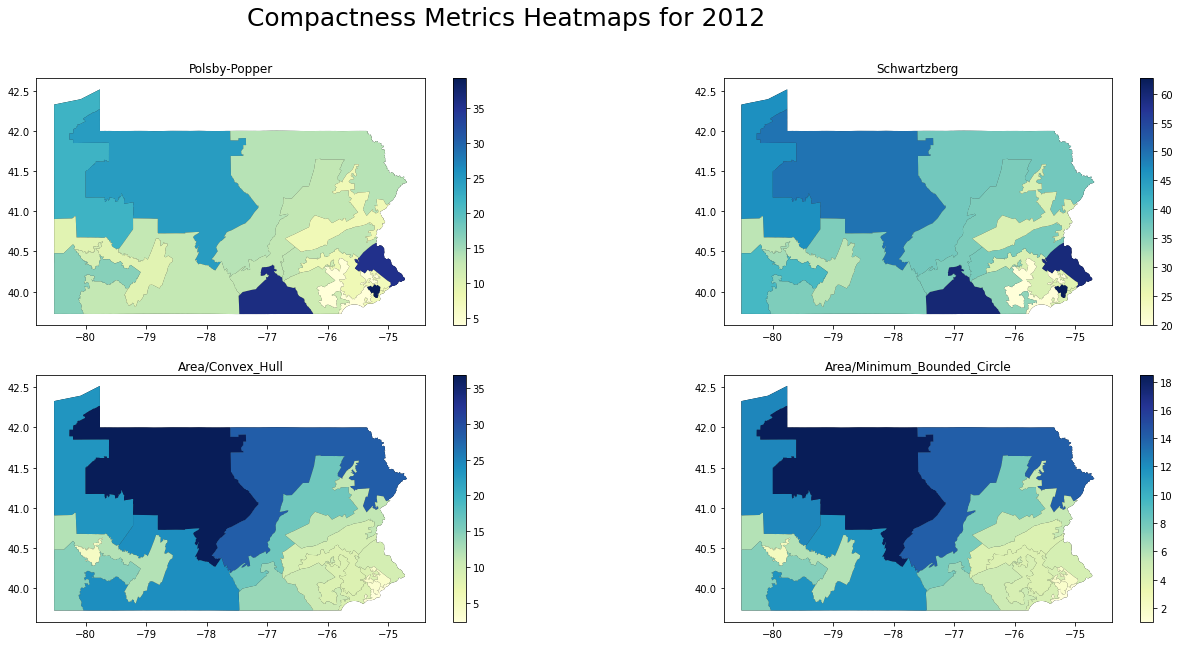

In [47]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(right=1)
axs[0,0].set_title("Polsby-Popper")
axs[0,1].set_title("Schwartzberg")
axs[1,0].set_title("Area/Convex_Hull")
axs[1,1].set_title("Area/Minimum_Bounded_Circle")
fig.suptitle('Compactness Metrics Heatmaps for 2012', fontsize=25)
geo_df_12.plot(ax=axs[0,0], color='Black', linewidth=.1)
geo_df_12.plot(column='polsby',cmap='YlGnBu', legend=True, ax=axs[0,0])
geo_df_12.plot(ax=axs[0,1], color='Black', linewidth=1)
geo_df_12.plot(column='schwartz',cmap='YlGnBu', legend=True, ax=axs[0,1])
geo_df_12.plot(ax=axs[1,0], color='Black', linewidth=1)
geo_df_12.plot(column='area/convex_hull', cmap='YlGnBu', legend=True, ax=axs[1,0])
geo_df_12.plot(ax=axs[1,1], color='Black', linewidth=1)
geo_df_12.plot(column='area/circle_area', cmap='YlGnBu', legend=True, ax=axs[1,1])
plt.show()


## Compactness Metric Heatmap for 2018 Congressional District

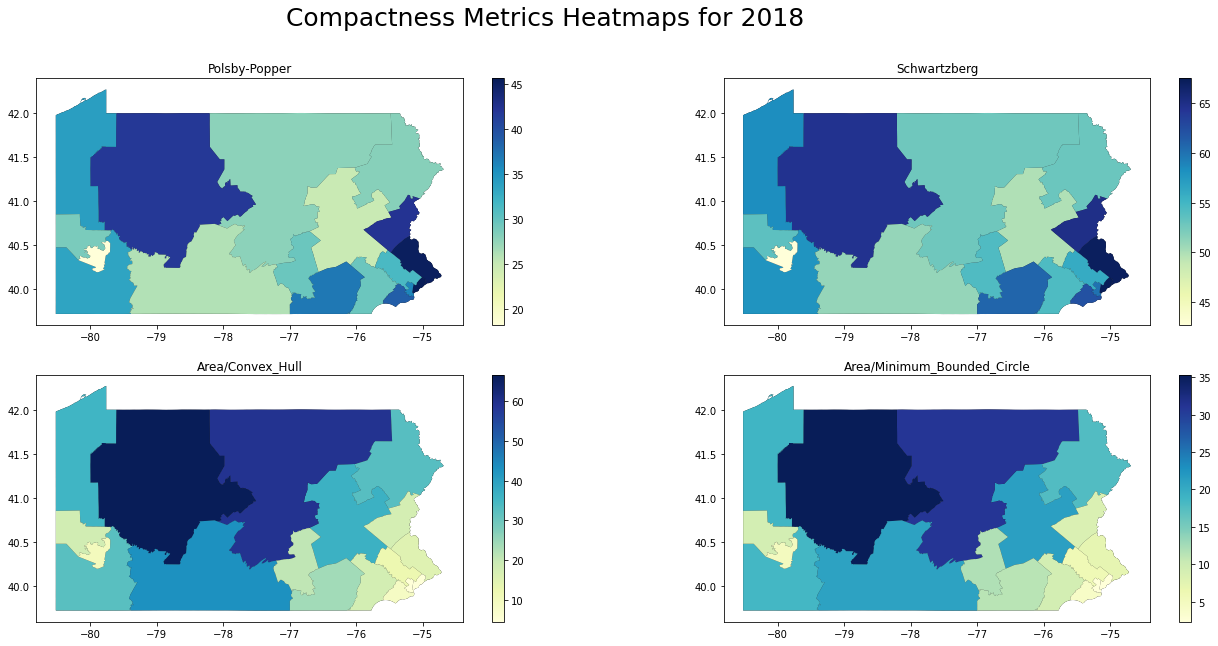

In [48]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 10))
plt.subplots_adjust(right=1)
axs[0,0].set_title("Polsby-Popper")
axs[0,1].set_title("Schwartzberg")
axs[1,0].set_title("Area/Convex_Hull")
axs[1,1].set_title("Area/Minimum_Bounded_Circle")
fig.suptitle('Compactness Metrics Heatmaps for 2018', fontsize=25)
geo_df_18.plot(ax=axs[0,0], color='Black', linewidth=1)
geo_df_18.plot(column='polsby',cmap='YlGnBu', legend=True, ax=axs[0,0])
geo_df_18.plot(ax=axs[0,1], color='Black', linewidth=1)
geo_df_18.plot(column='schwartz',cmap='YlGnBu', legend=True, ax=axs[0,1])
geo_df_18.plot(ax=axs[1,0], color='Black', linewidth=1)
geo_df_18.plot(column='area/convex_hull', cmap='YlGnBu', legend=True, ax=axs[1,0])
geo_df_18.plot(ax=axs[1,1], color='Black', linewidth=1)
geo_df_18.plot(column='area/circle_area', cmap='YlGnBu', legend=True, ax=axs[1,1])
plt.show()